# Two point sources Holography
==============================================

## Impact of the location of sources

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/CNRS
- date : April 10 2017


From book of J.W Goodman " Introduction à l'optique de Fourier et Holographie, Masson et Cie, 1972".
Chapter 8 : "Formation des images par reconstruction des surfaces d'onde ou Holographie.


To lauch the jupyter notebook do


- sage -n jupyter


## Théorie de l'holographie 

### Enregistrement de l'hologramme

On enregistre l'hologramme avec deux sources ponctuelles.
La longueur d'onde pour l'enregistrement est $\lambda_1$

- La source de référence positionnée en $(x_r,y_r,z_r)$ 
- L'objet est  positionné en $(x_o,y_o,z_o)$ 
- ${\bf A}$ et${\bf a}$ sont des constantes complexes)

L'amplitude enregistrée sur l'hologramme est $U(x,y)$
$$
{\bf U }(x,y) = {\bf A }\cdot \exp \left\{ j \frac{\pi}{\lambda_1 z_r} [(x-x_r)^2 + (y-y_r)^2] \right\} + {\bf a }\cdot \exp \left\{ j \frac{\pi}{\lambda_1 z_o} [(x-x_o)^2 + (y-y_o)^2] \right\}
$$

L'intensité enregistrée $I(x,y)$ est

$$
\begin{array} {ccl}
I(x,y) & = &|{\bf A}|^2 + |{\bf a}|^2  \\
& + & {\bf A^*} {\bf a }\cdot \exp \left\{ -j \frac{\pi}{\lambda_1 z_r} [ (x-x_r)^2 + (y-y_r)^2] + j \frac{\pi}{\lambda_1 z_o} [ (x-x_o)^2 + (y-y_o)^2] \right\} \\
& + & {\bf A} {\bf a^* }\cdot \exp \left\{ j \frac{\pi}{\lambda_1 z_r} [ (x-x_r)^2 + (y-y_r)^2] - j \frac{\pi}{\lambda_1 z_o} [ (x-x_o)^2 + (y-y_o)^2] \right\}
\end{array}
$$

L'hologramme enregistré présente donc 4 transmittances~:

$$
\begin{array}{lcl}
t_1 & = & \beta^\prime \cdot |{\bf A}|^2 \\
t_2 & = & \beta^\prime \cdot |{\bf a}|^2 \\
t_3(x,y) & = &  \beta^\prime \cdot {\bf A^*} {\bf a }\cdot \exp \left\{ -j \frac{\pi}{\lambda_1 z_r} [ (x-x_r)^2 + (y-y_r)^2] + j \frac{\pi}{\lambda_1 z_o} [ (x-x_o)^2 + (y-y_o)^2] \right\} \\
t_4(x,y) & = & \beta^\prime \cdot {\bf A} {\bf a^* }\cdot \exp \left\{ j \frac{\pi}{\lambda_1 z_r} [ (x-x_r)^2 + (y-y_r)^2] - j \frac{\pi}{\lambda_1 z_o} [ (x-x_o)^2 + (y-y_o)^2] \right\}
\end{array}
$$

Notons que les transmittances $t_1,t_2$ donneront une composante directe.
La transmittance $t_3(x,y)$ créera une image virtuelle et la transmittance $t_4(x,y)$ créera une image réelle.

### Reconstruction de l'objet avec l'hologramme

On éclaire  l'hologramme avec une onde sphérique positionnée en $(x_p,y_p,z_p)$:

$$
{\bf U_p }(x,y) = {\bf B }\cdot \exp \left\{ j \frac{\pi}{\lambda_2 z_p} [(x-x_r)^2 + (y-y_r)^2] \right\}
$$

On obtient ainsi les ondes $U_1(x,y),\cdots,U_4(x,y)$.

$$
\begin{array}{lcl}
{\bf U_3}(x,y) & =  & t_3(x,y)\cdot{\bf B }\cdot \exp \left\{ j \frac{\pi}{\lambda_2 z_p} [(x-x_r)^2 + (y-y_r)^2] \right\} \\
{\bf U_4}(x,y) & =  & t_4(x,y)\cdot{\bf B }\cdot \exp \left\{ j \frac{\pi}{\lambda_2 z_p} [(x-x_r)^2 + (y-y_r)^2] \right\} \\
\end{array}
$$


### Définition de toutes les variables

In [3]:
x,y,z=var('x y z')  # position of point in space
xr,yr,zr=var('xr yr zr')  # location of reference source point for hologram recording
xo,yo,zo=var('xo yo zo')  # localtion of object point source of which one want to make a real image
xp,yp,zp=var('xp yp zp')  # location of reference source for reconstruction
lb1,lb2=var('lb1 lb2') # wavelengths for recording and reconstruction

### Définition de la phase des fonctions t3 et t4

In [17]:
arg_t3(x,y,xr,yr,zr,xo,yo,zo,lb1)=-(pi/lb1/zr)*((x-xr)^2+(y-yr)^2) +(pi/lb1/zo)*((x-xo)^2+(y-yo)^2)

In [9]:
#arg_t3.expand()

In [18]:
arg_t4(x,y,xr,yr,zr,xo,yo,zo,lb1)=+(pi/lb1/zr)*((x-xr)^2+(y-yr)^2) -(pi/lb1/zo)*((x-xo)^2+(y-yo)^2)

In [10]:
#arg_t4.expand()

### Définition de la phase de  $U_p$

In [19]:
arg_up(x,y,xp,yp,zp,lb2)=(pi/lb2/zp)*((x-xp)^2+(y-yp)^2)

### définition de la phase de $U_3$ et $U_4$

In [21]:
arg_u3(x,y,xr,yr,zr,xo,yo,zo,xp,yp,zp,lb1,lb2)=arg_t3(x,y,xr,yr,zr,xo,yo,zo,lb1)+arg_up(x,y,xp,yp,zp,lb2)

In [20]:
arg_u4(x,y,xr,yr,zr,xo,yo,zo,xp,yp,zp,lb1,lb2)=arg_t4(x,y,xr,yr,zr,xo,yo,zo,lb1)+arg_up(x,y,xp,yp,zp,lb2)

In [28]:
show(LatexExpr(arg_u3))

(x, y, xr, yr, zr, xo, yo, zo, xp, yp, zp, lb1, lb2) |--> pi*((x - xo)^2 + (y - yo)^2)/(lb1*zo) + pi*((x - xp)^2 + (y - yp)^2)/(lb2*zp) - pi*((x - xr)^2 + (y - yr)^2)/(lb1*zr)

In [23]:
show(LatexExpr(arg_u4))

(x, y, xr, yr, zr, xo, yo, zo, xp, yp, zp, lb1, lb2) |--> -pi*((x - xo)^2 + (y - yo)^2)/(lb1*zo) + pi*((x - xp)^2 + (y - yp)^2)/(lb2*zp) + pi*((x - xr)^2 + (y - yr)^2)/(lb1*zr)

In [29]:
arg_u3.expand()

(x, y, xr, yr, zr, xo, yo, zo, xp, yp, zp, lb1, lb2) |--> pi*x^2/(lb1*zo) - 2*pi*x*xo/(lb1*zo) + pi*xo^2/(lb1*zo) + pi*y^2/(lb1*zo) - 2*pi*y*yo/(lb1*zo) + pi*yo^2/(lb1*zo) + pi*x^2/(lb2*zp) - 2*pi*x*xp/(lb2*zp) + pi*xp^2/(lb2*zp) + pi*y^2/(lb2*zp) - 2*pi*y*yp/(lb2*zp) + pi*yp^2/(lb2*zp) - pi*x^2/(lb1*zr) + 2*pi*x*xr/(lb1*zr) - pi*xr^2/(lb1*zr) - pi*y^2/(lb1*zr) + 2*pi*y*yr/(lb1*zr) - pi*yr^2/(lb1*zr)

In [50]:
dev_argu3=arg_u3.expand().collect(x).collect(y)

#### $\arg(U_3(x,y))$
----------------------

- regrouper les termes en $x^2+y^2$
- regrouper les termes en $x x_i+y y_i$

In [51]:
show(LatexExpr(dev_argu3))

(x, y, xr, yr, zr, xo, yo, zo, xp, yp, zp, lb1, lb2) |--> x^2*(pi/(lb1*zo) + pi/(lb2*zp) - pi/(lb1*zr)) + y^2*(pi/(lb1*zo) + pi/(lb2*zp) - pi/(lb1*zr)) - 2*x*(pi*xo/(lb1*zo) + pi*xp/(lb2*zp) - pi*xr/(lb1*zr)) - 2*y*(pi*yo/(lb1*zo) + pi*yp/(lb2*zp) - pi*yr/(lb1*zr)) + pi*xo^2/(lb1*zo) + pi*yo^2/(lb1*zo) + pi*xp^2/(lb2*zp) + pi*yp^2/(lb2*zp) - pi*xr^2/(lb1*zr) - pi*yr^2/(lb1*zr)

In [63]:
dev_argu4=arg_u4.expand().collect(x).collect(y)

#### $\arg(U_4(x,y))$
---------------------

In [64]:
show(LatexExpr(dev_argu4))

(x, y, xr, yr, zr, xo, yo, zo, xp, yp, zp, lb1, lb2) |--> -x^2*(pi/(lb1*zo) - pi/(lb2*zp) - pi/(lb1*zr)) - y^2*(pi/(lb1*zo) - pi/(lb2*zp) - pi/(lb1*zr)) + 2*x*(pi*xo/(lb1*zo) - pi*xp/(lb2*zp) - pi*xr/(lb1*zr)) + 2*y*(pi*yo/(lb1*zo) - pi*yp/(lb2*zp) - pi*yr/(lb1*zr)) - pi*xo^2/(lb1*zo) - pi*yo^2/(lb1*zo) + pi*xp^2/(lb2*zp) + pi*yp^2/(lb2*zp) + pi*xr^2/(lb1*zr) + pi*yr^2/(lb1*zr)

### Regroupement des termes en $(x^2+y^2)$ caractéristiques d'une onde sphérique convergente ou divergente

Le terme caractéristique de l'image
$$
\exp \left\{j \frac{\pi}{\lambda_2 z_i} (x^2+y^2)\right\}
$$
permet d'exprimer $z_i$ en fonction de $z_p,z_r,z_o, \lambda_1, \lambda_2$


In [86]:
arg_t3_x2plusy2(zr,zo,zp,lb1,lb2)=pi*(1/lb1/zo+1/lb2/zp-1/lb1/zr)

In [87]:
arg_t4_x2plusy2(zr,zo,zp,lb1,lb2)=-pi*(1/lb1/zo+1/lb2/zp+1/lb1/zr)

In [88]:
arg_u_img(zi,lb2)=pi/lb2/zi

#### Résolution d'équations

In [92]:
expr_zi1(zr,zo,zp,lb1,lb2)=(solve(arg_t3_x2plusy2(zr,zo,zp,lb1,lb2)==arg_u_img(zi,lb2),zi))[0].rhs()

In [93]:
expr_zi2(zr,zo,zp,lb1,lb2)=solve(arg_t4_x2plusy2(zr,zo,zp,lb1,lb2)==arg_u_img(zi,lb2),zi)[0].rhs()

In [147]:
(1/expr_zi1).factor()

(zr, zo, zp, lb1, lb2) |--> -(lb2*zo*zp - lb1*zo*zr - lb2*zp*zr)/(lb1*zo*zp*zr)

In [133]:
(1/expr_zi2).factor()

(zr, zo, zp, lb1, lb2) |--> -(lb2*zo*zp + lb1*zo*zr + lb2*zp*zr)/(lb1*zo*zp*zr)

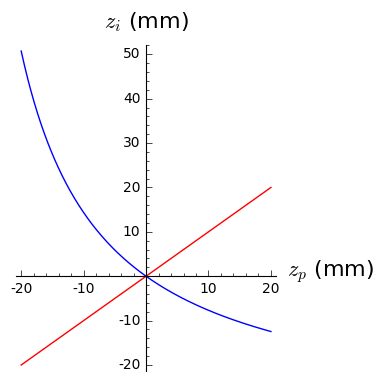

In [149]:
zr_0=56.6 # mm
zo_0=56.6 # mm 
lb1_0=0.0007  # mm longeur d'onde d'enregistrement
lb2_0=0.0006  # mm longueur d'onde de reconstruction
p1=plot(expr_zi1(zr_0,zo_0,zp,lb1_0,lb2_0),(zp,-20,20),color='red')
p2=plot(expr_zi2(zr_0,zo_0,zp,lb1_0,lb2_0),(zp,-20,20),color='blue')
p3=p1+p2
p3.show(axes_labels=('$z_p$ (mm)','$z_i$ (mm)'),figsize=(4,4))

Je ne comprends pas trop la courbe bleue. Ce serait celle de l'image virtuelle ?

Le résultat pour la distance $z$ du plan focal est :

$$
z_i= \frac{1}{\frac{1}{z_p} \pm \frac{\lambda_2}{\lambda_1}(\frac{1}{z_0}-\frac{1}{z_r})}
$$

Il suffit que $z_r=z_o$, pour que $z_i=z_p$ même si $\lambda_1 \neq \lambda_2$

### Regroupement des termes en $(x x_i+y y_i)$ 

Le terme
$$
\exp \left\{-j\frac{2\pi}{\lambda_2 z_i} (xx_i+y y_i )\right\}
$$
permet d'exprimer la position dans le plan de l'image $(x_i,y_i)$ en fonction de $z_p,z_r,z_o,z_i \lambda_1, \lambda_2$

- de $U_3$:

$$
\begin{array}{lcr}
x_i & = & - \frac{\lambda_2}{\lambda_1} \frac{z_i}{z_0} x_0+ \frac{\lambda_2}{\lambda_1} \frac{z_i}{z_r} x_r + \frac{z_i}{z_p} x_p \\
y_i & = & - \frac{\lambda_2}{\lambda_1} \frac{z_i}{z_0} y_0+ \frac{\lambda_2}{\lambda_1} \frac{z_i}{z_r} y_r + \frac{z_i}{z_p} y_p 
\end{array}
$$

- de $U_4$:

$$
\begin{array}{lcr}
x_i & = &  \frac{\lambda_2}{\lambda_1} \frac{z_i}{z_0} x_0- \frac{\lambda_2}{\lambda_1} \frac{z_i}{z_r} x_r + \frac{z_i}{z_p} x_p \\
y_i & = &  \frac{\lambda_2}{\lambda_1} \frac{z_i}{z_0} y_0- \frac{\lambda_2}{\lambda_1} \frac{z_i}{z_r} y_r + \frac{z_i}{z_p} y_p 
\end{array}
$$

On a donc un agrandissement tel que

$$
\left( \mp \frac{\lambda_2}{\lambda_1} \frac{z_i}{z_o} \Delta x_0, \mp \frac{\lambda_2}{\lambda_1} \frac{z_i}{z_o} \Delta y_0  \right)
$$

